In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Dropout, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 13, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │        19,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,493 (76.14 KB)

 Trainable params: 19,493 (76.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0303 - val_loss: 0.0014
Epoch 2/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0043 - val_loss: 4.8960e-04
Epoch 3/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0042 - val_loss: 2.6208e-04
Epoch 4/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0035 - val_loss: 0.0025
Epoch 5/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - val_loss: 3.7502e-04
Epoch 6/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0027 - val_loss: 4.1701e-04
Epoch 7/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0025 - val_loss: 5.9131e-04
Epoch 8/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024 - val_loss: 5.3995e-04
Epoch 9/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0019 - val_loss: 2.9436e-04
Epoch 10/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021 - val_loss: 0.0014
Epoch 11/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020 - val_loss: 0.0035
Epoch 12/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/

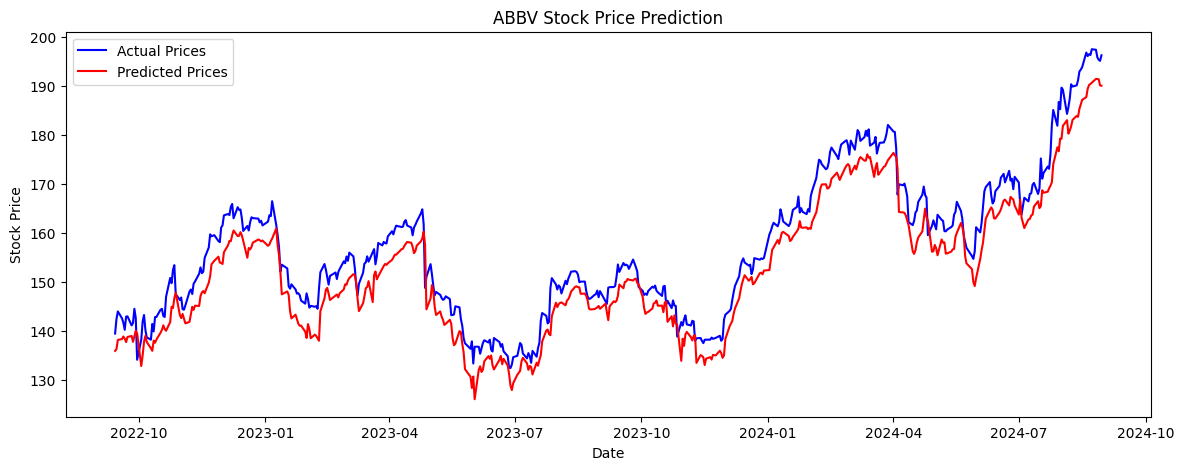

In [2]:
# Load the data from the Data folder
data_folder = 'Data'
file_name = 'ABBV_processed_data.csv'
file_path = data_folder + "/" + file_name


abbv_df = pd.read_csv(file_path, parse_dates=['Date'])


#print(abbv_df.shape)
#abbv_df.head()


# Handle missing values by dropping rows with NaN
abbv_df = abbv_df.dropna()


# Select all features and target
features = ['Open', 'High', 'Low', 'Adj Close', 'Volume', '5_day_SMA', '20_day_SMA', '50_day_SMA',
            '14_day_RSI', 'Lagged_Close', 'ATR', 'Day_of_Week', 'Daily_Return', 'Volatility']
abbv_X = abbv_df[features]
abbv_y = abbv_df['Close']  # Target variable: the 'Close' price


# Shift the features to align with the target variable
abbv_X = abbv_X.shift(1)  # Shift features down by 1 to make day t-1 correspond to day t
abbv_y = abbv_y[1:]  # The target starts from the second entry (day t)


# Drop the first row as it will contain NaN values due to shifting
abbv_X = abbv_X.dropna()
abbv_y = abbv_y.dropna()


abbv_df = abbv_df.iloc[1:]  # Drop the first row of the original DataFrame
abbv_dates = abbv_df['Date']  # Get the adjusted dates


# Now drop the dates that correspond to the remaining data
abbv_dates = abbv_dates.dropna()  # Ensure dates match the new X and y


# Scale the features between 0 and 1 using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
abbv_X_scaled = scaler.fit_transform(abbv_X)


abbv_X_scaled = abbv_X_scaled.reshape((abbv_X_scaled.shape[0], abbv_X_scaled.shape[1], 1))  # Reshape for 1D CNN


abbv_y_scaled = scaler.fit_transform(abbv_y.values.reshape(-1, 1))


# Split the data in time sequence (80% training, 20% testing)
abbv_split_index = int(len(abbv_X_scaled) * 0.8)  # Calculate the index for the 80-20 split


abbv_X_train = abbv_X_scaled[:abbv_split_index]
abbv_X_test = abbv_X_scaled[abbv_split_index:]
abbv_y_train = abbv_y_scaled[:abbv_split_index]
abbv_y_test = abbv_y_scaled[abbv_split_index:]
abbv_dates_train = abbv_dates[:abbv_split_index]
abbv_dates_test = abbv_dates[abbv_split_index:]


# Extract corresponding dates for test set (if needed for plotting later)
abbv_test_dates = abbv_df['Date'].values[abbv_split_index:]


#print(f"X_train shape: {abbv_X_train.shape}")  # Should be (samples, features, 1)
#print(f"X_test shape: {abbv_X_test.shape}")
#print(f"y_train shape: {abbv_X_train.shape}")  # Should be (samples, features, 1)
#print(f"y_test shape: {abbv_X_test.shape}")


# Define the CNN model with Dropout
abbv_model = Sequential()


# 1D Convolutional layer
abbv_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(len(features), 1)))
abbv_model.add(MaxPooling1D(pool_size=2))


# Add Dropout after Conv layer to prevent overfitting
abbv_model.add(Dropout(0.3))  # Dropout 30% of the units


# Flatten the 1D output to feed into dense layers
abbv_model.add(Flatten())


# Fuabbv connected layer
abbv_model.add(Dense(50, activation='relu'))


# Add Dropout after the Dense layer
abbv_model.add(Dropout(0.3))  # Dropout 30% of the units


# Output layer (1 neuron for predicting the 'Close' price)
abbv_model.add(Dense(1))


# Compile the model
abbv_model.compile(optimizer='adam', loss='mse')


# Model summary
abbv_model.summary()


# Train the model
abbv_model.fit(abbv_X_train, abbv_y_train, epochs=60, batch_size=32, validation_data=(abbv_X_test, abbv_y_test))


# Evaluate the model
abbv_test_loss = abbv_model.evaluate(abbv_X_test, abbv_y_test)
print(f'Test Loss: {abbv_test_loss}')


# After model predictions
abbv_cnn_predicted_prices = abbv_model.predict(abbv_X_test)


# Convert y_test to a NumPy array before flattening
abbv_y_test = np.array(abbv_y_test)


# Inverse transformation for predicted prices
abbv_cnn_predicted_prices_reshaped = np.zeros((abbv_cnn_predicted_prices.shape[0], abbv_X.shape[1]))  # Create a 2D array with the same number of features
abbv_cnn_predicted_prices_reshaped[:, 3] = abbv_cnn_predicted_prices.flatten()  # Fill the 'Close' column (index 3)


# Inverse transform to get back the original prices
abbv_cnn_predicted_prices_inverse = scaler.inverse_transform(abbv_cnn_predicted_prices_reshaped)[:, 3]  # Extract only the 'Close' prices after inverse transform


# Inverse transformation for actual prices
abbv_cnn_ytest_reshaped = np.zeros((abbv_y_test.shape[0], abbv_X.shape[1]))  # Create a 2D array for actual values
abbv_cnn_ytest_reshaped[:, 3] = abbv_y_test.flatten()  # Fill the 'Close' column


# Inverse scale to get the actual 'Close' values
abbv_cnn_actual_prices_inverse = scaler.inverse_transform(abbv_cnn_ytest_reshaped)[:, 3]  # Extract only the 'Close' prices


# Calculate RMSE and MAE
abbv_rmse = np.sqrt(mean_squared_error(abbv_cnn_actual_prices_inverse, abbv_cnn_predicted_prices_inverse))
abbv_mae = mean_absolute_error(abbv_cnn_actual_prices_inverse, abbv_cnn_predicted_prices_inverse)


print(f'RMSE: {abbv_rmse}')
print(f'MAE: {abbv_mae}')


#Plot
plt.figure(figsize=(14, 5))
plt.plot(abbv_dates_test, abbv_cnn_actual_prices_inverse, color='blue', label='Actual Prices')
plt.plot(abbv_dates_test, abbv_cnn_predicted_prices_inverse, color='red', label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('ABBV Stock Price Prediction')
plt.legend()
plt.show()

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 13, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │        19,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,493 (76.14 KB)

 Trainable params: 19,493 (76.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0449 - val_loss: 0.0015
Epoch 2/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0114 - val_loss: 0.0013
Epoch 3/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0093 - val_loss: 0.0011
Epoch 4/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0082 - val_loss: 6.3151e-04
Epoch 5/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0075 - val_loss: 5.6001e-04
Epoch 6/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0068 - val_loss: 6.9440e-04
Epoch 7/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0061 - val_loss: 6.2475e-04
Epoch 8/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0049 - val_loss: 0.0030
Epoch 9/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0053 - val_loss: 8.7271e-04
Epoch 10/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0044 - val_loss: 6.5489e-04
Epoch 11/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0039 - val_loss: 6.1484e-04
Epoch 12/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms

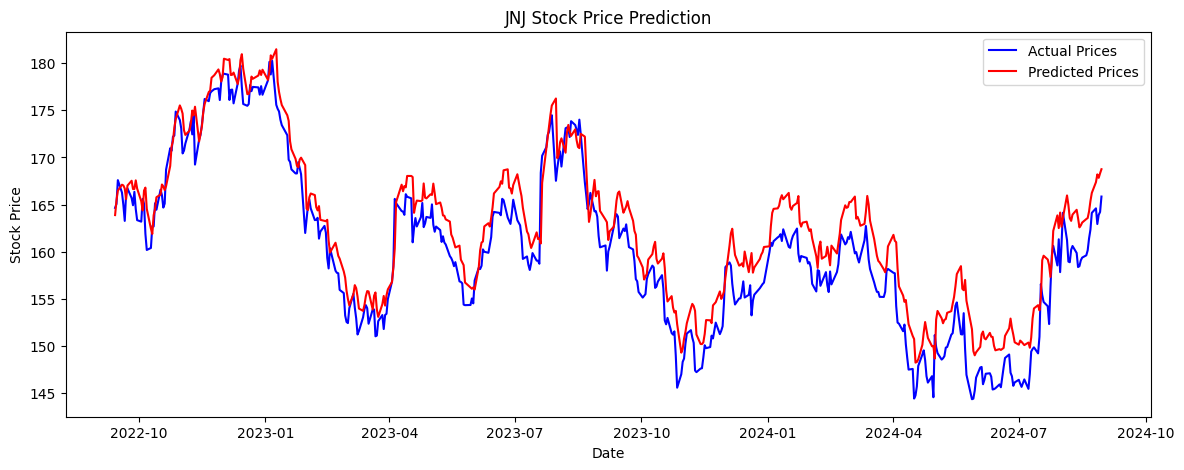

In [3]:
# Load the data from the Data folder
data_folder = 'Data'
file_name = 'JNJ_processed_data.csv'
file_path = data_folder + "/" + file_name


jnj_df = pd.read_csv(file_path, parse_dates=['Date'])


#print(jnj_df.shape)
#jnj_df.head()


# Handle missing values by dropping rows with NaN
jnj_df = jnj_df.dropna()


# Select all features and target
features = ['Open', 'High', 'Low', 'Adj Close', 'Volume', '5_day_SMA', '20_day_SMA', '50_day_SMA',
            '14_day_RSI', 'Lagged_Close', 'ATR', 'Day_of_Week', 'Daily_Return', 'Volatility']
jnj_X = jnj_df[features]
jnj_y = jnj_df['Close']  # Target variable: the 'Close' price


# Shift the features to align with the target variable
jnj_X = jnj_X.shift(1)  # Shift features down by 1 to make day t-1 correspond to day t
jnj_y = jnj_y[1:]  # The target starts from the second entry (day t)


# Drop the first row as it will contain NaN values due to shifting
jnj_X = jnj_X.dropna()
jnj_y = jnj_y.dropna()


jnj_df = jnj_df.iloc[1:]  # Drop the first row of the original DataFrame
jnj_dates = jnj_df['Date']  # Get the adjusted dates


# Now drop the dates that correspond to the remaining data
jnj_dates = jnj_dates.dropna()  # Ensure dates match the new X and y


# Scale the features between 0 and 1 using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
jnj_X_scaled = scaler.fit_transform(jnj_X)


jnj_X_scaled = jnj_X_scaled.reshape((jnj_X_scaled.shape[0], jnj_X_scaled.shape[1], 1))  # Reshape for 1D CNN


jnj_y_scaled = scaler.fit_transform(jnj_y.values.reshape(-1, 1))


# Split the data in time sequence (80% training, 20% testing)
jnj_split_index = int(len(jnj_X_scaled) * 0.8)  # Calculate the index for the 80-20 split


jnj_X_train = jnj_X_scaled[:jnj_split_index]
jnj_X_test = jnj_X_scaled[jnj_split_index:]
jnj_y_train = jnj_y_scaled[:jnj_split_index]
jnj_y_test = jnj_y_scaled[jnj_split_index:]
jnj_dates_train = jnj_dates[:jnj_split_index]
jnj_dates_test = jnj_dates[jnj_split_index:]


# Extract corresponding dates for test set (if needed for plotting later)
jnj_test_dates = jnj_df['Date'].values[jnj_split_index:]


#print(f"X_train shape: {jnj_X_train.shape}")  # Should be (samples, features, 1)
#print(f"X_test shape: {jnj_X_test.shape}")
#print(f"y_train shape: {jnj_X_train.shape}")  # Should be (samples, features, 1)
#print(f"y_test shape: {jnj_X_test.shape}")


# Define the CNN model with Dropout
jnj_model = Sequential()


# 1D Convolutional layer
jnj_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(len(features), 1)))
jnj_model.add(MaxPooling1D(pool_size=2))


# Add Dropout after Conv layer to prevent overfitting
jnj_model.add(Dropout(0.3))  # Dropout 30% of the units


# Flatten the 1D output to feed into dense layers
jnj_model.add(Flatten())


# Fully connected layer
jnj_model.add(Dense(50, activation='relu'))


# Add Dropout after the Dense layer
jnj_model.add(Dropout(0.3))  # Dropout 30% of the units


# Output layer (1 neuron for predicting the 'Close' price)
jnj_model.add(Dense(1))


# Compile the model
jnj_model.compile(optimizer='adam', loss='mse')


# Model summary
jnj_model.summary()


# Train the model
jnj_model.fit(jnj_X_train, jnj_y_train, epochs=60, batch_size=32, validation_data=(jnj_X_test, jnj_y_test))


# Evaluate the model
jnj_test_loss = jnj_model.evaluate(jnj_X_test, jnj_y_test)
print(f'Test Loss: {jnj_test_loss}')


# After model predictions
jnj_cnn_predicted_prices = jnj_model.predict(jnj_X_test)


# Convert y_test to a NumPy array before flattening
jnj_y_test = np.array(jnj_y_test)


# Inverse transformation for predicted prices
jnj_cnn_predicted_prices_reshaped = np.zeros((jnj_cnn_predicted_prices.shape[0], jnj_X.shape[1]))  # Create a 2D array with the same number of features
jnj_cnn_predicted_prices_reshaped[:, 3] = jnj_cnn_predicted_prices.flatten()  # Fill the 'Close' column (index 3)


# Inverse transform to get back the original prices
jnj_cnn_predicted_prices_inverse = scaler.inverse_transform(jnj_cnn_predicted_prices_reshaped)[:, 3]  # Extract only the 'Close' prices after inverse transform


# Inverse transformation for actual prices
jnj_cnn_ytest_reshaped = np.zeros((jnj_y_test.shape[0], jnj_X.shape[1]))  # Create a 2D array for actual values
jnj_cnn_ytest_reshaped[:, 3] = jnj_y_test.flatten()  # Fill the 'Close' column


# Inverse scale to get the actual 'Close' values
jnj_cnn_actual_prices_inverse = scaler.inverse_transform(jnj_cnn_ytest_reshaped)[:, 3]  # Extract only the 'Close' prices


# Calculate RMSE and MAE
jnj_rmse = np.sqrt(mean_squared_error(jnj_cnn_actual_prices_inverse, jnj_cnn_predicted_prices_inverse))
jnj_mae = mean_absolute_error(jnj_cnn_actual_prices_inverse, jnj_cnn_predicted_prices_inverse)


print(f'RMSE: {jnj_rmse}')
print(f'MAE: {jnj_mae}')


#Plot
plt.figure(figsize=(14, 5))
plt.plot(jnj_dates_test, jnj_cnn_actual_prices_inverse, color='blue', label='Actual Prices')
plt.plot(jnj_dates_test, jnj_cnn_predicted_prices_inverse, color='red', label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('JNJ Stock Price Prediction')
plt.legend()
plt.show()

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 13, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │        19,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,493 (76.14 KB)

 Trainable params: 19,493 (76.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0033 - val_loss: 4.8633e-04
Epoch 2/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.2171e-04 - val_loss: 0.0011
Epoch 3/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.8560e-04 - val_loss: 3.7354e-04
Epoch 4/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.0791e-04 - val_loss: 0.0010
Epoch 5/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.4880e-04 - val_loss: 2.7132e-04
Epoch 6/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.9785e-04 - val_loss: 0.0019
Epoch 7/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.7938e-04 - val_loss: 0.0012
Epoch 8/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.4338e-04 - val_loss: 5.1493e-04
Epoch 9/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1461e-04 - val_loss: 6.1007e-04
Epoch 10/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7743e-04 - val_loss: 2.3689e-04
Epoch 11/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9250e-04 - val_loss: 7.5836e-04
Epoch

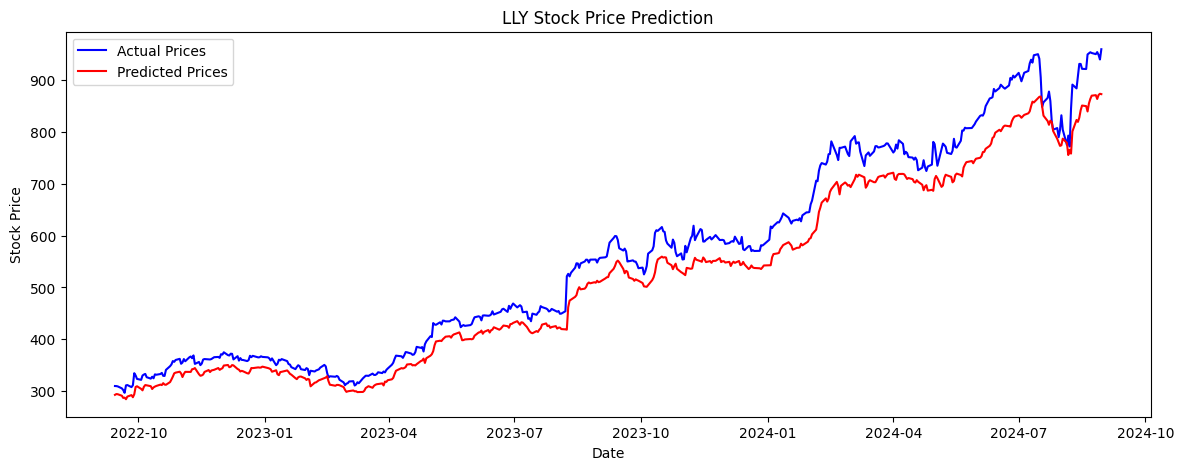

In [4]:
# Load the data from the Data folder
data_folder = 'Data'
file_name = 'LLY_processed_data.csv'
file_path = data_folder + "/" + file_name


lly_df = pd.read_csv(file_path, parse_dates=['Date'])


#print(lly_df.shape)
#lly_df.head()


# Handle missing values by dropping rows with NaN
lly_df = lly_df.dropna()


# Select all features and target
features = ['Open', 'High', 'Low', 'Adj Close', 'Volume', '5_day_SMA', '20_day_SMA', '50_day_SMA',
            '14_day_RSI', 'Lagged_Close', 'ATR', 'Day_of_Week', 'Daily_Return', 'Volatility']
lly_X = lly_df[features]
lly_y = lly_df['Close']  # Target variable: the 'Close' price


# Shift the features to align with the target variable
lly_X = lly_X.shift(1)  # Shift features down by 1 to make day t-1 correspond to day t
lly_y = lly_y[1:]  # The target starts from the second entry (day t)


# Drop the first row as it will contain NaN values due to shifting
lly_X = lly_X.dropna()
lly_y = lly_y.dropna()


lly_df = lly_df.iloc[1:]  # Drop the first row of the original DataFrame
lly_dates = lly_df['Date']  # Get the adjusted dates


# Now drop the dates that correspond to the remaining data
lly_dates = lly_dates.dropna()  # Ensure dates match the new X and y


# Scale the features between 0 and 1 using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
lly_X_scaled = scaler.fit_transform(lly_X)


lly_X_scaled = lly_X_scaled.reshape((lly_X_scaled.shape[0], lly_X_scaled.shape[1], 1))  # Reshape for 1D CNN


lly_y_scaled = scaler.fit_transform(lly_y.values.reshape(-1, 1))


# Split the data in time sequence (80% training, 20% testing)
lly_split_index = int(len(lly_X_scaled) * 0.8)  # Calculate the index for the 80-20 split


lly_X_train = lly_X_scaled[:lly_split_index]
lly_X_test = lly_X_scaled[lly_split_index:]
lly_y_train = lly_y_scaled[:lly_split_index]
lly_y_test = lly_y_scaled[lly_split_index:]
lly_dates_train = lly_dates[:lly_split_index]
lly_dates_test = lly_dates[lly_split_index:]


# Extract corresponding dates for test set (if needed for plotting later)
lly_test_dates = lly_df['Date'].values[lly_split_index:]


#print(f"X_train shape: {lly_X_train.shape}")  # Should be (samples, features, 1)
#print(f"X_test shape: {lly_X_test.shape}")
#print(f"y_train shape: {lly_X_train.shape}")  # Should be (samples, features, 1)
#print(f"y_test shape: {lly_X_test.shape}")


# Define the CNN model with Dropout
lly_model = Sequential()


# 1D Convolutional layer
lly_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(len(features), 1)))
lly_model.add(MaxPooling1D(pool_size=2))


# Add Dropout after Conv layer to prevent overfitting
lly_model.add(Dropout(0.3))  # Dropout 30% of the units


# Flatten the 1D output to feed into dense layers
lly_model.add(Flatten())


# Fully connected layer
lly_model.add(Dense(50, activation='relu'))


# Add Dropout after the Dense layer
lly_model.add(Dropout(0.3))  # Dropout 30% of the units


# Output layer (1 neuron for predicting the 'Close' price)
lly_model.add(Dense(1))


# Compile the model
lly_model.compile(optimizer='adam', loss='mse')


# Model summary
lly_model.summary()


# Train the model
lly_model.fit(lly_X_train, lly_y_train, epochs=60, batch_size=32, validation_data=(lly_X_test, lly_y_test))


# Evaluate the model
lly_test_loss = lly_model.evaluate(lly_X_test, lly_y_test)
print(f'Test Loss: {lly_test_loss}')


# After model predictions
lly_cnn_predicted_prices = lly_model.predict(lly_X_test)


# Convert y_test to a NumPy array before flattening
lly_y_test = np.array(lly_y_test)


# Inverse transformation for predicted prices
lly_cnn_predicted_prices_reshaped = np.zeros((lly_cnn_predicted_prices.shape[0], lly_X.shape[1]))  # Create a 2D array with the same number of features
lly_cnn_predicted_prices_reshaped[:, 3] = lly_cnn_predicted_prices.flatten()  # Fill the 'Close' column (index 3)


# Inverse transform to get back the original prices
lly_cnn_predicted_prices_inverse = scaler.inverse_transform(lly_cnn_predicted_prices_reshaped)[:, 3]  # Extract only the 'Close' prices after inverse transform


# Inverse transformation for actual prices
lly_cnn_ytest_reshaped = np.zeros((lly_y_test.shape[0], lly_X.shape[1]))  # Create a 2D array for actual values
lly_cnn_ytest_reshaped[:, 3] = lly_y_test.flatten()  # Fill the 'Close' column


# Inverse scale to get the actual 'Close' values
lly_cnn_actual_prices_inverse = scaler.inverse_transform(lly_cnn_ytest_reshaped)[:, 3]  # Extract only the 'Close' prices


# Calculate RMSE and MAE
lly_rmse = np.sqrt(mean_squared_error(lly_cnn_actual_prices_inverse, lly_cnn_predicted_prices_inverse))
lly_mae = mean_absolute_error(lly_cnn_actual_prices_inverse, lly_cnn_predicted_prices_inverse)


print(f'RMSE: {lly_rmse}')
print(f'MAE: {lly_mae}')


#Plot
plt.figure(figsize=(14, 5))
plt.plot(lly_dates_test, lly_cnn_actual_prices_inverse, color='blue', label='Actual Prices')
plt.plot(lly_dates_test, lly_cnn_predicted_prices_inverse, color='red', label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('LLY Stock Price Prediction')
plt.legend()
plt.show()

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 13, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 50)             │        19,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,493 (76.14 KB)

 Trainable params: 19,493 (76.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0219 - val_loss: 0.0029
Epoch 2/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0043 - val_loss: 5.7723e-04
Epoch 3/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0031 - val_loss: 4.7043e-04
Epoch 4/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - val_loss: 0.0030
Epoch 5/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023 - val_loss: 3.9573e-04
Epoch 6/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021 - val_loss: 0.0026
Epoch 7/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018 - val_loss: 0.0024
Epoch 8/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017 - val_loss: 4.9097e-04
Epoch 9/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0016 - val_loss: 4.8709e-04
Epoch 10/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017 - val_loss: 0.0034
Epoch 11/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0014 - val_loss: 4.6802e-04
Epoch 12/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/ste

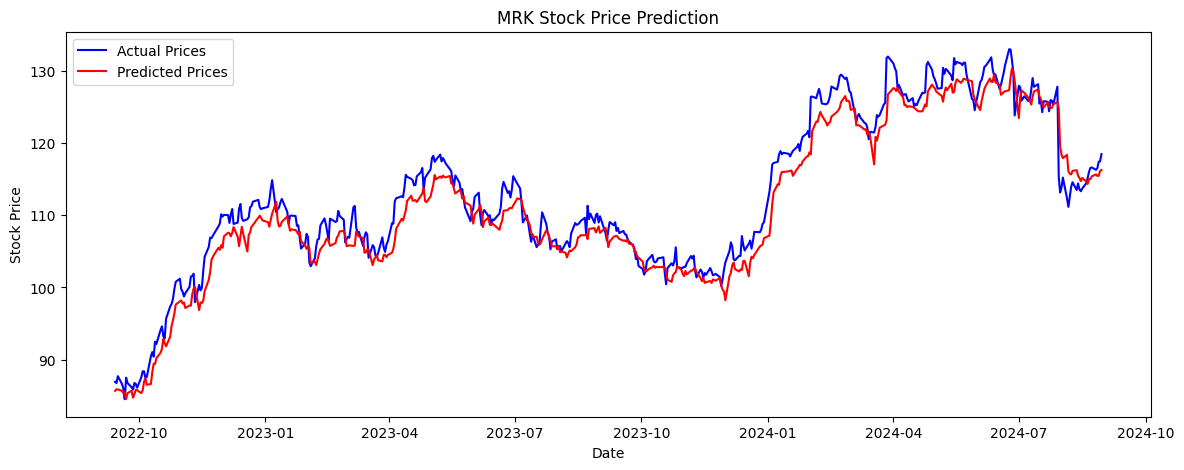

In [5]:
# Load the data from the Data folder
data_folder = 'Data'
file_name = 'MRK_processed_data.csv'
file_path = data_folder + "/" + file_name


mrk_df = pd.read_csv(file_path, parse_dates=['Date'])


#print(mrk_df.shape)
#mrk_df.head()


# Handle missing values by dropping rows with NaN
mrk_df = mrk_df.dropna()


# Select all features and target
features = ['Open', 'High', 'Low', 'Adj Close', 'Volume', '5_day_SMA', '20_day_SMA', '50_day_SMA',
            '14_day_RSI', 'Lagged_Close', 'ATR', 'Day_of_Week', 'Daily_Return', 'Volatility']
mrk_X = mrk_df[features]
mrk_y = mrk_df['Close']  # Target variable: the 'Close' price


# Shift the features to align with the target variable
mrk_X = mrk_X.shift(1)  # Shift features down by 1 to make day t-1 correspond to day t
mrk_y = mrk_y[1:]  # The target starts from the second entry (day t)


# Drop the first row as it will contain NaN values due to shifting
mrk_X = mrk_X.dropna()
mrk_y = mrk_y.dropna()


mrk_df = mrk_df.iloc[1:]  # Drop the first row of the original DataFrame
mrk_dates = mrk_df['Date']  # Get the adjusted dates


# Now drop the dates that correspond to the remaining data
mrk_dates = mrk_dates.dropna()  # Ensure dates match the new X and y


# Scale the features between 0 and 1 using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
mrk_X_scaled = scaler.fit_transform(mrk_X)


mrk_X_scaled = mrk_X_scaled.reshape((mrk_X_scaled.shape[0], mrk_X_scaled.shape[1], 1))  # Reshape for 1D CNN


mrk_y_scaled = scaler.fit_transform(mrk_y.values.reshape(-1, 1))


# Split the data in time sequence (80% training, 20% testing)
mrk_split_index = int(len(mrk_X_scaled) * 0.8)  # Calculate the index for the 80-20 split


mrk_X_train = mrk_X_scaled[:mrk_split_index]
mrk_X_test = mrk_X_scaled[mrk_split_index:]
mrk_y_train = mrk_y_scaled[:mrk_split_index]
mrk_y_test = mrk_y_scaled[mrk_split_index:]
mrk_dates_train = mrk_dates[:mrk_split_index]
mrk_dates_test = mrk_dates[mrk_split_index:]


# Extract corresponding dates for test set (if needed for plotting later)
mrk_test_dates = mrk_df['Date'].values[mrk_split_index:]


#print(f"X_train shape: {mrk_X_train.shape}")  # Should be (samples, features, 1)
#print(f"X_test shape: {mrk_X_test.shape}")
#print(f"y_train shape: {mrk_X_train.shape}")  # Should be (samples, features, 1)
#print(f"y_test shape: {mrk_X_test.shape}")


# Define the CNN model with Dropout
mrk_model = Sequential()


# 1D Convolutional layer
mrk_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(len(features), 1)))
mrk_model.add(MaxPooling1D(pool_size=2))


# Add Dropout after Conv layer to prevent overfitting
mrk_model.add(Dropout(0.3))  # Dropout 30% of the units


# Flatten the 1D output to feed into dense layers
mrk_model.add(Flatten())


# Fumrk connected layer
mrk_model.add(Dense(50, activation='relu'))


# Add Dropout after the Dense layer
mrk_model.add(Dropout(0.3))  # Dropout 30% of the units


# Output layer (1 neuron for predicting the 'Close' price)
mrk_model.add(Dense(1))


# Compile the model
mrk_model.compile(optimizer='adam', loss='mse')


# Model summary
mrk_model.summary()


# Train the model
mrk_model.fit(mrk_X_train, mrk_y_train, epochs=60, batch_size=32, validation_data=(mrk_X_test, mrk_y_test))


# Evaluate the model
mrk_test_loss = mrk_model.evaluate(mrk_X_test, mrk_y_test)
print(f'Test Loss: {mrk_test_loss}')


# After model predictions
mrk_cnn_predicted_prices = mrk_model.predict(mrk_X_test)


# Convert y_test to a NumPy array before flattening
mrk_y_test = np.array(mrk_y_test)


# Inverse transformation for predicted prices
mrk_cnn_predicted_prices_reshaped = np.zeros((mrk_cnn_predicted_prices.shape[0], mrk_X.shape[1]))  # Create a 2D array with the same number of features
mrk_cnn_predicted_prices_reshaped[:, 3] = mrk_cnn_predicted_prices.flatten()  # Fill the 'Close' column (index 3)


# Inverse transform to get back the original prices
mrk_cnn_predicted_prices_inverse = scaler.inverse_transform(mrk_cnn_predicted_prices_reshaped)[:, 3]  # Extract only the 'Close' prices after inverse transform


# Inverse transformation for actual prices
mrk_cnn_ytest_reshaped = np.zeros((mrk_y_test.shape[0], mrk_X.shape[1]))  # Create a 2D array for actual values
mrk_cnn_ytest_reshaped[:, 3] = mrk_y_test.flatten()  # Fill the 'Close' column


# Inverse scale to get the actual 'Close' values
mrk_cnn_actual_prices_inverse = scaler.inverse_transform(mrk_cnn_ytest_reshaped)[:, 3]  # Extract only the 'Close' prices


# Calculate RMSE and MAE
mrk_rmse = np.sqrt(mean_squared_error(mrk_cnn_actual_prices_inverse, mrk_cnn_predicted_prices_inverse))
mrk_mae = mean_absolute_error(mrk_cnn_actual_prices_inverse, mrk_cnn_predicted_prices_inverse)


print(f'RMSE: {mrk_rmse}')
print(f'MAE: {mrk_mae}')


#Plot
plt.figure(figsize=(14, 5))
plt.plot(mrk_dates_test, mrk_cnn_actual_prices_inverse, color='blue', label='Actual Prices')
plt.plot(mrk_dates_test, mrk_cnn_predicted_prices_inverse, color='red', label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('MRK Stock Price Prediction')
plt.legend()
plt.show()

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 13, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 50)             │        19,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,493 (76.14 KB)

 Trainable params: 19,493 (76.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0695 - val_loss: 0.0026
Epoch 2/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0076 - val_loss: 0.0051
Epoch 3/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0074 - val_loss: 8.2680e-04
Epoch 4/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - val_loss: 0.0028
Epoch 5/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - val_loss: 0.0013
Epoch 6/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0050 - val_loss: 4.4150e-04
Epoch 7/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0046 - val_loss: 0.0014
Epoch 8/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0050 - val_loss: 0.0019
Epoch 9/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0046 - val_loss: 5.9828e-04
Epoch 10/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0041 - val_loss: 0.0027
Epoch 11/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0042 - val_loss: 5.6432e-04
Epoch 12/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss

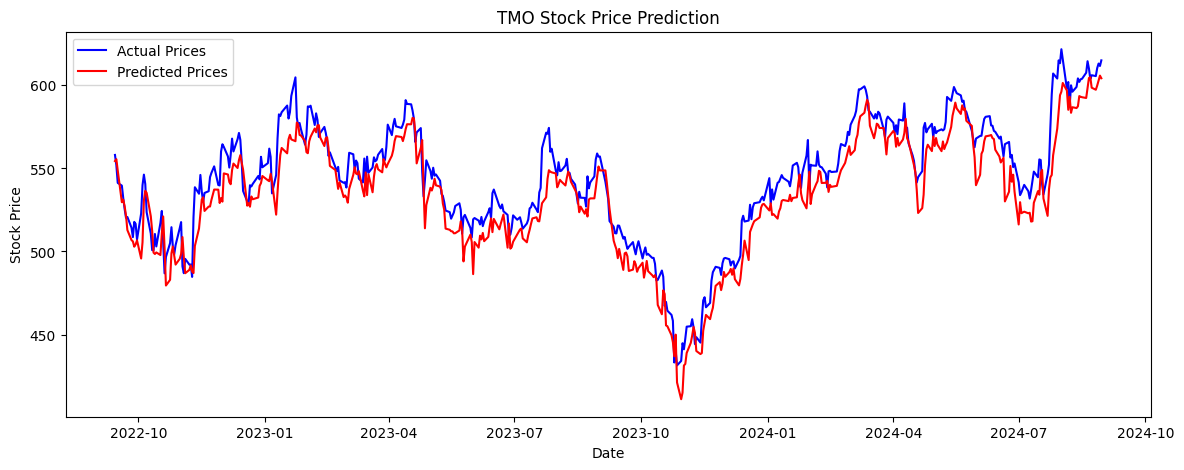

In [6]:
# Load the data from the Data folder
data_folder = 'Data'
file_name = 'TMO_processed_data.csv'
file_path = data_folder + "/" + file_name


tmo_df = pd.read_csv(file_path, parse_dates=['Date'])


#print(tmo_df.shape)
#tmo_df.head()


# Handle missing values by dropping rows with NaN
tmo_df = tmo_df.dropna()


# Select all features and target
features = ['Open', 'High', 'Low', 'Adj Close', 'Volume', '5_day_SMA', '20_day_SMA', '50_day_SMA',
            '14_day_RSI', 'Lagged_Close', 'ATR', 'Day_of_Week', 'Daily_Return', 'Volatility']
tmo_X = tmo_df[features]
tmo_y = tmo_df['Close']  # Target variable: the 'Close' price


# Shift the features to align with the target variable
tmo_X = tmo_X.shift(1)  # Shift features down by 1 to make day t-1 correspond to day t
tmo_y = tmo_y[1:]  # The target starts from the second entry (day t)


# Drop the first row as it will contain NaN values due to shifting
tmo_X = tmo_X.dropna()
tmo_y = tmo_y.dropna()


tmo_df = tmo_df.iloc[1:]  # Drop the first row of the original DataFrame
tmo_dates = tmo_df['Date']  # Get the adjusted dates


# Now drop the dates that correspond to the remaining data
tmo_dates = tmo_dates.dropna()  # Ensure dates match the new X and y


# Scale the features between 0 and 1 using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
tmo_X_scaled = scaler.fit_transform(tmo_X)


tmo_X_scaled = tmo_X_scaled.reshape((tmo_X_scaled.shape[0], tmo_X_scaled.shape[1], 1))  # Reshape for 1D CNN


tmo_y_scaled = scaler.fit_transform(tmo_y.values.reshape(-1, 1))


# Split the data in time sequence (80% training, 20% testing)
tmo_split_index = int(len(tmo_X_scaled) * 0.8)  # Calculate the index for the 80-20 split


tmo_X_train = tmo_X_scaled[:tmo_split_index]
tmo_X_test = tmo_X_scaled[tmo_split_index:]
tmo_y_train = tmo_y_scaled[:tmo_split_index]
tmo_y_test = tmo_y_scaled[tmo_split_index:]
tmo_dates_train = tmo_dates[:tmo_split_index]
tmo_dates_test = tmo_dates[tmo_split_index:]


# Extract corresponding dates for test set (if needed for plotting later)
tmo_test_dates = tmo_df['Date'].values[tmo_split_index:]


#print(f"X_train shape: {tmo_X_train.shape}")  # Should be (samples, features, 1)
#print(f"X_test shape: {tmo_X_test.shape}")
#print(f"y_train shape: {tmo_X_train.shape}")  # Should be (samples, features, 1)
#print(f"y_test shape: {tmo_X_test.shape}")


# Define the CNN model with Dropout
tmo_model = Sequential()


# 1D Convolutional layer
tmo_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(len(features), 1)))
tmo_model.add(MaxPooling1D(pool_size=2))


# Add Dropout after Conv layer to prevent overfitting
tmo_model.add(Dropout(0.3))  # Dropout 30% of the units


# Flatten the 1D output to feed into dense layers
tmo_model.add(Flatten())


# Futmo connected layer
tmo_model.add(Dense(50, activation='relu'))


# Add Dropout after the Dense layer
tmo_model.add(Dropout(0.3))  # Dropout 30% of the units


# Output layer (1 neuron for predicting the 'Close' price)
tmo_model.add(Dense(1))


# Compile the model
tmo_model.compile(optimizer='adam', loss='mse')


# Model summary
tmo_model.summary()


# Train the model
tmo_model.fit(tmo_X_train, tmo_y_train, epochs=60, batch_size=32, validation_data=(tmo_X_test, tmo_y_test))


# Evaluate the model
tmo_test_loss = tmo_model.evaluate(tmo_X_test, tmo_y_test)
print(f'Test Loss: {tmo_test_loss}')


# After model predictions
tmo_cnn_predicted_prices = tmo_model.predict(tmo_X_test)


# Convert y_test to a NumPy array before flattening
tmo_y_test = np.array(tmo_y_test)


# Inverse transformation for predicted prices
tmo_cnn_predicted_prices_reshaped = np.zeros((tmo_cnn_predicted_prices.shape[0], tmo_X.shape[1]))  # Create a 2D array with the same number of features
tmo_cnn_predicted_prices_reshaped[:, 3] = tmo_cnn_predicted_prices.flatten()  # Fill the 'Close' column (index 3)


# Inverse transform to get back the original prices
tmo_cnn_predicted_prices_inverse = scaler.inverse_transform(tmo_cnn_predicted_prices_reshaped)[:, 3]  # Extract only the 'Close' prices after inverse transform


# Inverse transformation for actual prices
tmo_cnn_ytest_reshaped = np.zeros((tmo_y_test.shape[0], tmo_X.shape[1]))  # Create a 2D array for actual values
tmo_cnn_ytest_reshaped[:, 3] = tmo_y_test.flatten()  # Fill the 'Close' column


# Inverse scale to get the actual 'Close' values
tmo_cnn_actual_prices_inverse = scaler.inverse_transform(tmo_cnn_ytest_reshaped)[:, 3]  # Extract only the 'Close' prices


# Calculate RMSE and MAE
tmo_rmse = np.sqrt(mean_squared_error(tmo_cnn_actual_prices_inverse, tmo_cnn_predicted_prices_inverse))
tmo_mae = mean_absolute_error(tmo_cnn_actual_prices_inverse, tmo_cnn_predicted_prices_inverse)


print(f'RMSE: {tmo_rmse}')
print(f'MAE: {tmo_mae}')


#Plot
plt.figure(figsize=(14, 5))
plt.plot(tmo_dates_test, tmo_cnn_actual_prices_inverse, color='blue', label='Actual Prices')
plt.plot(tmo_dates_test, tmo_cnn_predicted_prices_inverse, color='red', label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('TMO Stock Price Prediction')
plt.legend()
plt.show()

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)               │ (None, 13, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 50)             │        19,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,493 (76.14 KB)

 Trainable params: 19,493 (76.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0423 - val_loss: 9.8000e-04
Epoch 2/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0064 - val_loss: 0.0011
Epoch 3/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0052 - val_loss: 0.0038
Epoch 4/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0046 - val_loss: 0.0014
Epoch 5/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0044 - val_loss: 0.0027
Epoch 6/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0037 - val_loss: 0.0019
Epoch 7/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0041 - val_loss: 6.4824e-04
Epoch 8/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0033 - val_loss: 0.0027
Epoch 9/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0034 - val_loss: 4.6761e-04
Epoch 10/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0033 - val_loss: 6.1759e-04
Epoch 11/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0029 - val_loss: 5.2762e-04
Epoch 12/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - l

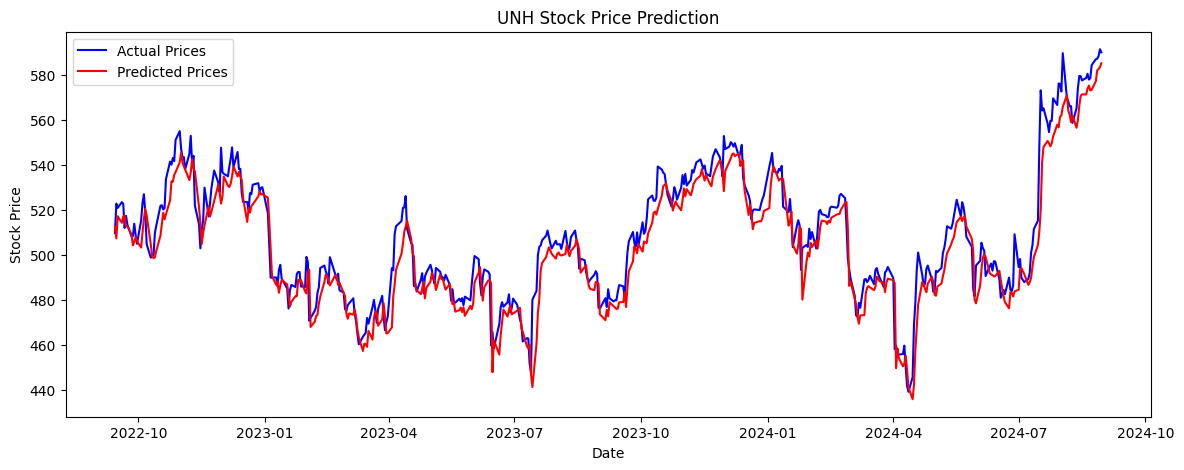

In [7]:
# Load the data from the Data folder
data_folder = 'Data'
file_name = 'UNH_processed_data.csv'
file_path = data_folder + "/" + file_name


unh_df = pd.read_csv(file_path, parse_dates=['Date'])


#print(unh_df.shape)
#unh_df.head()


# Handle missing values by dropping rows with NaN
unh_df = unh_df.dropna()


# Select all features and target
features = ['Open', 'High', 'Low', 'Adj Close', 'Volume', '5_day_SMA', '20_day_SMA', '50_day_SMA',
            '14_day_RSI', 'Lagged_Close', 'ATR', 'Day_of_Week', 'Daily_Return', 'Volatility']
unh_X = unh_df[features]
unh_y = unh_df['Close']  # Target variable: the 'Close' price


# Shift the features to align with the target variable
unh_X = unh_X.shift(1)  # Shift features down by 1 to make day t-1 correspond to day t
unh_y = unh_y[1:]  # The target starts from the second entry (day t)


# Drop the first row as it will contain NaN values due to shifting
unh_X = unh_X.dropna()
unh_y = unh_y.dropna()


unh_df = unh_df.iloc[1:]  # Drop the first row of the original DataFrame
unh_dates = unh_df['Date']  # Get the adjusted dates


# Now drop the dates that correspond to the remaining data
unh_dates = unh_dates.dropna()  # Ensure dates match the new X and y


# Scale the features between 0 and 1 using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
unh_X_scaled = scaler.fit_transform(unh_X)


unh_X_scaled = unh_X_scaled.reshape((unh_X_scaled.shape[0], unh_X_scaled.shape[1], 1))  # Reshape for 1D CNN


unh_y_scaled = scaler.fit_transform(unh_y.values.reshape(-1, 1))


# Split the data in time sequence (80% training, 20% testing)
unh_split_index = int(len(unh_X_scaled) * 0.8)  # Calculate the index for the 80-20 split


unh_X_train = unh_X_scaled[:unh_split_index]
unh_X_test = unh_X_scaled[unh_split_index:]
unh_y_train = unh_y_scaled[:unh_split_index]
unh_y_test = unh_y_scaled[unh_split_index:]
unh_dates_train = unh_dates[:unh_split_index]
unh_dates_test = unh_dates[unh_split_index:]


# Extract corresponding dates for test set (if needed for plotting later)
unh_test_dates = unh_df['Date'].values[unh_split_index:]


#print(f"X_train shape: {unh_X_train.shape}")  # Should be (samples, features, 1)
#print(f"X_test shape: {unh_X_test.shape}")
#print(f"y_train shape: {unh_X_train.shape}")  # Should be (samples, features, 1)
#print(f"y_test shape: {unh_X_test.shape}")


# Define the CNN model with Dropout
unh_model = Sequential()


# 1D Convolutional layer
unh_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(len(features), 1)))
unh_model.add(MaxPooling1D(pool_size=2))


# Add Dropout after Conv layer to prevent overfitting
unh_model.add(Dropout(0.3))  # Dropout 30% of the units


# Flatten the 1D output to feed into dense layers
unh_model.add(Flatten())


# Fuunh connected layer
unh_model.add(Dense(50, activation='relu'))


# Add Dropout after the Dense layer
unh_model.add(Dropout(0.3))  # Dropout 30% of the units


# Output layer (1 neuron for predicting the 'Close' price)
unh_model.add(Dense(1))


# Compile the model
unh_model.compile(optimizer='adam', loss='mse')


# Model summary
unh_model.summary()


# Train the model
unh_model.fit(unh_X_train, unh_y_train, epochs=60, batch_size=32, validation_data=(unh_X_test, unh_y_test))


# Evaluate the model
unh_test_loss = unh_model.evaluate(unh_X_test, unh_y_test)
print(f'Test Loss: {unh_test_loss}')


# After model predictions
unh_cnn_predicted_prices = unh_model.predict(unh_X_test)


# Convert y_test to a NumPy array before flattening
unh_y_test = np.array(unh_y_test)


# Inverse transformation for predicted prices
unh_cnn_predicted_prices_reshaped = np.zeros((unh_cnn_predicted_prices.shape[0], unh_X.shape[1]))  # Create a 2D array with the same number of features
unh_cnn_predicted_prices_reshaped[:, 3] = unh_cnn_predicted_prices.flatten()  # Fill the 'Close' column (index 3)


# Inverse transform to get back the original prices
unh_cnn_predicted_prices_inverse = scaler.inverse_transform(unh_cnn_predicted_prices_reshaped)[:, 3]  # Extract only the 'Close' prices after inverse transform


# Inverse transformation for actual prices
unh_cnn_ytest_reshaped = np.zeros((unh_y_test.shape[0], unh_X.shape[1]))  # Create a 2D array for actual values
unh_cnn_ytest_reshaped[:, 3] = unh_y_test.flatten()  # Fill the 'Close' column


# Inverse scale to get the actual 'Close' values
unh_cnn_actual_prices_inverse = scaler.inverse_transform(unh_cnn_ytest_reshaped)[:, 3]  # Extract only the 'Close' prices


# Calculate RMSE and MAE
unh_rmse = np.sqrt(mean_squared_error(unh_cnn_actual_prices_inverse, unh_cnn_predicted_prices_inverse))
unh_mae = mean_absolute_error(unh_cnn_actual_prices_inverse, unh_cnn_predicted_prices_inverse)


print(f'RMSE: {unh_rmse}')
print(f'MAE: {unh_mae}')


#Plot
plt.figure(figsize=(14, 5))
plt.plot(unh_dates_test, unh_cnn_actual_prices_inverse, color='blue', label='Actual Prices')
plt.plot(unh_dates_test, unh_cnn_predicted_prices_inverse, color='red', label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('UNH Stock Price Prediction')
plt.legend()
plt.show()



In [9]:
#Computing Tech RMSE and Tech MAE

health_rmse_list = [abbv_rmse, jnj_rmse, lly_rmse, mrk_rmse, tmo_rmse, unh_rmse]
health_mae_list = [abbv_mae, jnj_mae, lly_mae, mrk_mae, tmo_mae, unh_mae]

health_rmse = np.average(health_rmse_list)
health_mae = np.average(health_mae_list)

print(f'Health_RMSE: {health_rmse}')
print(f'Health_MAE: {health_mae}')

Health_RMSE: 13.621033357505668
Health_MAE: 11.625103398513502
